 The older way of looking at skew was to compare the mean $\mu$, median $v$, and standard deviation $\sigma$.
 That way of looking at skew is called nonparametric skew:
 $$ S = \frac{\mu - v}{\sigma} $$
 Using this statistic a value close to zero indicates the distribution is symmetric and normally distributed.
 It has also been used to determine on which side a tail is for a dataset.
 A positive value means the mean is right of the median whereas
 a negative value means the mean is left of the median.

 There is also the Pearson's moment coefficient of skewness is defined as
 $$ \bar\mu_3 = E\left[\left(\frac{X - \mu}{\sigma}\right)^3\right] $$
 where $X$ is the randomVariable $\mu$ is the mean and $\sigma$ is the standard deviation.


 These statistics are not the best tests for determining a tails direction as its not always the case the mean is on the same side as the tail.
 Consider the following [dataset](https://data.census.gov/cedsci/table?q=B08201&g=0500000US29037&tid=ACSDT5Y2017.B08201&vintage=2017&hidePreview=true&layer=VT_2017_040_00_PP_D1&cid=B08201_001E) from the census bureau on the number of cars per household in Cass County Missouri. A comparison is made where the bin values are extrapolated and watch how both nonparametric and pearsons third moment "point" the wrong way based on the sign. A weighted distribution to one side with a tail will throw off these statistics for determining tail direction. Also other distributions fail to return the correct tail direction as well. These skewness statistics are perhaps more consistent as a way to look at normalcy than tail direction.
 A weighted average can be used to find the average number of cars per household.
 The general idea behind weighting is that a vector of values is dotted with a vector of weights.
 We can extend the idea of weighting to both variance and pearsonsMoment.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math


In [2]:
class Report:

    def __init__(self,randomVariable,weights) -> None:
        self.randomVariable = randomVariable
        self.weights = weights
        self.mean = self.weightedAverage(self.randomVariable,self.weights)
        self.median = np.median(self.randomVariable)
        self.mode = max(weights)
        self.variance = self.weightedVariance(self.randomVariable,self.weights,self.mean)
        self.standardDeviation = math.sqrt(self.variance)
        self.npSkew = self.nonparametricSkew(self.mean,self.median,self.standardDeviation)
        self.pearsonsMoment = self.pearsonsMomentWeighted(self.randomVariable,self.weights,self.mean,self.standardDeviation)
    
    def __repr__(self) -> str:
        return f"""
Mean: {self.mean}\tMedian: {self.median}\tMode:{self.weights.index(self.mode)}
NonParametric Skew: {self.npSkew}
Pearsons Moment: {self.pearsonsMoment}
        """

    def weightedAverage(self,randomVariable: list, weights: list) -> float:
        sumOfWeightsAndVariables = 0
        sumOfWeights = 0
        for i in range(0,len(randomVariable)):
            sumOfWeightsAndVariables = (randomVariable[i] * weights[i]) + sumOfWeightsAndVariables
            sumOfWeights = weights[i] + sumOfWeights
        return sumOfWeightsAndVariables/sumOfWeights

    def weightedVariance(self,randomVariable: list, weights: list, mean) -> float:
        sumOfWeightsAndVariables = 0
        sumOfWeights = 0
        for i in range(0,len(randomVariable)):
            sumOfWeightsAndVariables =((randomVariable[i] - mean)**2 * weights[i]) + sumOfWeightsAndVariables
            sumOfWeights = weights[i] + sumOfWeights
        return sumOfWeightsAndVariables/sumOfWeights

    def nonparametricSkew(self,mean,median,standardDeviation) -> float:
        return (mean - median) / standardDeviation

    def pearsonsMomentWeighted(self,randomVariable: list,weights: list, mean, standardDeviation) -> float:
        return (self.weightedAverage([x**3 for x in randomVariable],[x for x in weights]) - 3*mean*standardDeviation**2 - mean**3) / standardDeviation**3




Mean: 2.0777915568645686	Median: 2.0	Mode:2
NonParametric Skew: 0.07821016820257348
Pearsons Moment: 0.22138883711217036
        


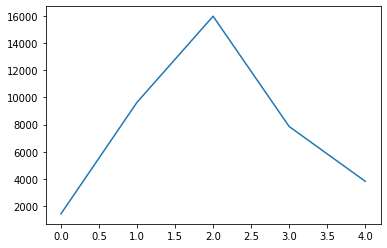

In [3]:
carsInCassCounty = [1432,9634,15959,7853,3828] #Index corresponds to household size per vehicles available.
carsPerHousehold = [x for x in range(0,len(carsInCassCounty))]

plt.plot(carsPerHousehold,carsInCassCounty)
carsReport = Report(carsPerHousehold,carsInCassCounty)
print(carsReport)



Mean: 2.1703870201002426	Median: 3.5	Mode:2
NonParametric Skew: -1.0853226173183548
Pearsons Moment: 1.142070747239084
        


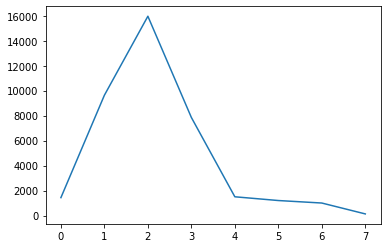

In [4]:
carsInCassCountyExtrapolatedBin = [1432,9634,15959,7853,1500,1200,1000,128] #Extrapolated 4 or more cars to 4,5,6,and '7 or more' for demonstration.
carsPer_extrap = [x for x in range(0,len(carsInCassCountyExtrapolatedBin))]

plt.plot(carsPer_extrap,carsInCassCountyExtrapolatedBin)
extrapReport = Report(carsPer_extrap,carsInCassCountyExtrapolatedBin)
print(extrapReport)



Mean: 1.3450988510506159	Median: 2.5	Mode:2
NonParametric Skew: -1.402022285178414
Pearsons Moment: -0.4907210735486981
        


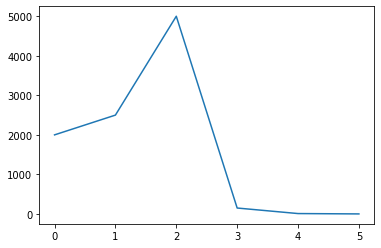

In [5]:
weightedSet = [2000,2500,5000,150,10,1] #Heavy weighted dataset
carsPer_weighted = [x for x in range(0,len(weightedSet))]

plt.plot(carsPer_weighted,weightedSet)
weightedReport = Report(carsPer_weighted,weightedSet)
print(weightedReport)



 # Additional Reading
 [Mean, Median, and Skew: Correcting a Textbook Rule](http://jse.amstat.org/v13n2/vonhippel.html)


 [Measuring Skewness: A Forgotten Statistic?](http://www.amstat.org/publications/jse/v19n2/doane.pdf)